# Tecnicas de programação II - Gráficos com Pandas

In [1]:
import pandas as pd
import seaborn as sns

#### Questão 1

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset.

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


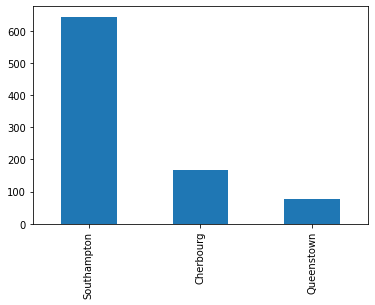

In [3]:
titanic['embark_town'].value_counts().plot.bar();

#### Questão 2

Criar um gráfico com a biblioteca Pandas que mostre a quantidade de pessoas por cidade de embarque, coluna embark_town no dataset separados pelo sexo, coluna sex no dataset.

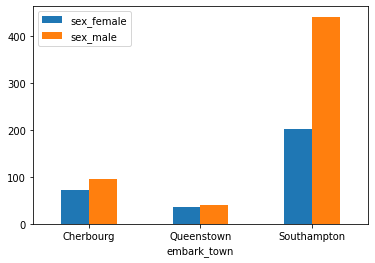

In [4]:
pd.get_dummies(titanic, columns=['sex'])\
  .groupby(['embark_town'])\
  .sum()[['sex_female','sex_male']]\
  .plot.bar(rot=0);

#### Questão 3

Criar um gráfico com a biblioteca Pandas que mostre o percentual pelo sexo das pessoas no Titanic.

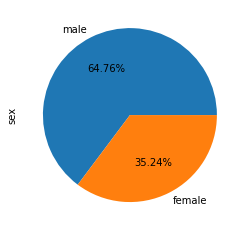

In [5]:
titanic['sex'].value_counts().plot.pie(autopct='%1.2f%%');

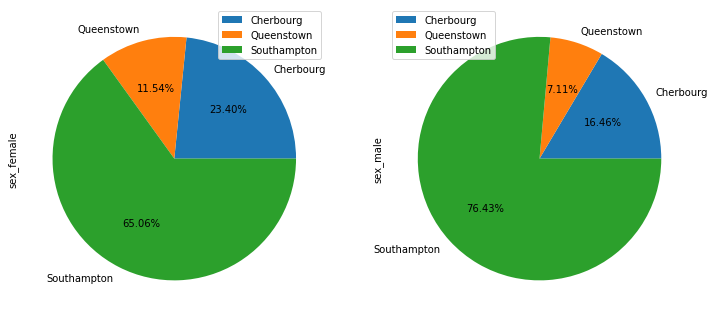

In [6]:
pd.get_dummies(titanic, columns=['sex'])\
  .groupby(['embark_town']).sum()[['sex_female','sex_male']]\
  .plot.pie(subplots=True, figsize=(12,6), autopct='%1.2f%%');

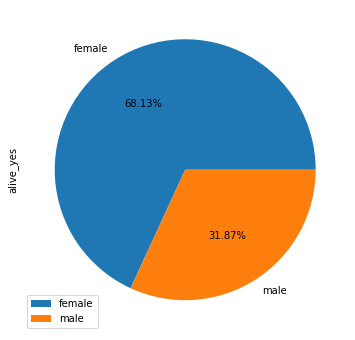

In [9]:
pd.get_dummies(titanic, columns=['alive'])\
  .groupby(['sex']).sum()[['alive_yes']]\
  .plot.pie(subplots=True, figsize=(12,6), autopct='%1.2f%%');

#### Questão 4

Criar um gráfico com a biblioteca Pandas que mostre os outliers da idade das pessoas no Titanic, coluna age no dataset.

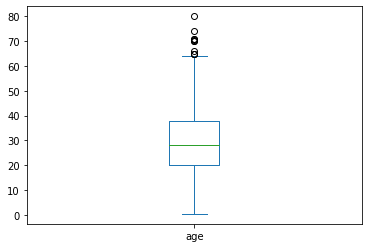

In [53]:
titanic['age'].dropna().plot.box();

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


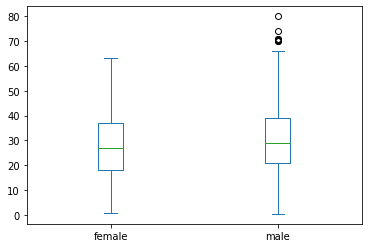

In [15]:
titanic[['age','sex']]\
  .dropna()\
  .reset_index()\
  .pivot('index','sex','age')\
  .plot.box();

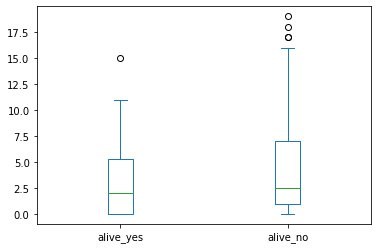

In [54]:
pd.get_dummies(titanic, columns=['alive'])\
  .groupby(['age']).sum()[['alive_yes','alive_no']]\
  .dropna().plot.box();

#### Questão 5

Criar um gráfico com a biblioteca Pandas que mostre os outliers da tarifa de embarque das pessoas no Titanic, coluna fare no dataset.

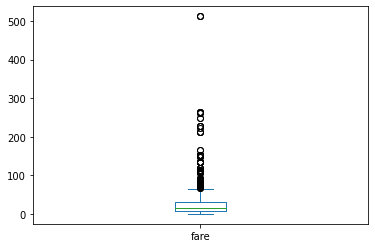

In [29]:
titanic['fare'].plot.box();

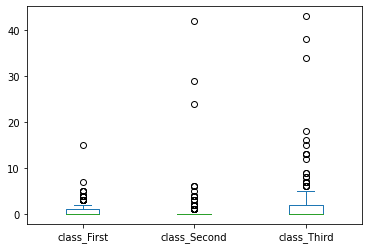

In [32]:
pd.get_dummies(titanic, columns=['class'])\
  .groupby(['fare']).sum()[['class_First','class_Second','class_Third']]\
  .plot.box();

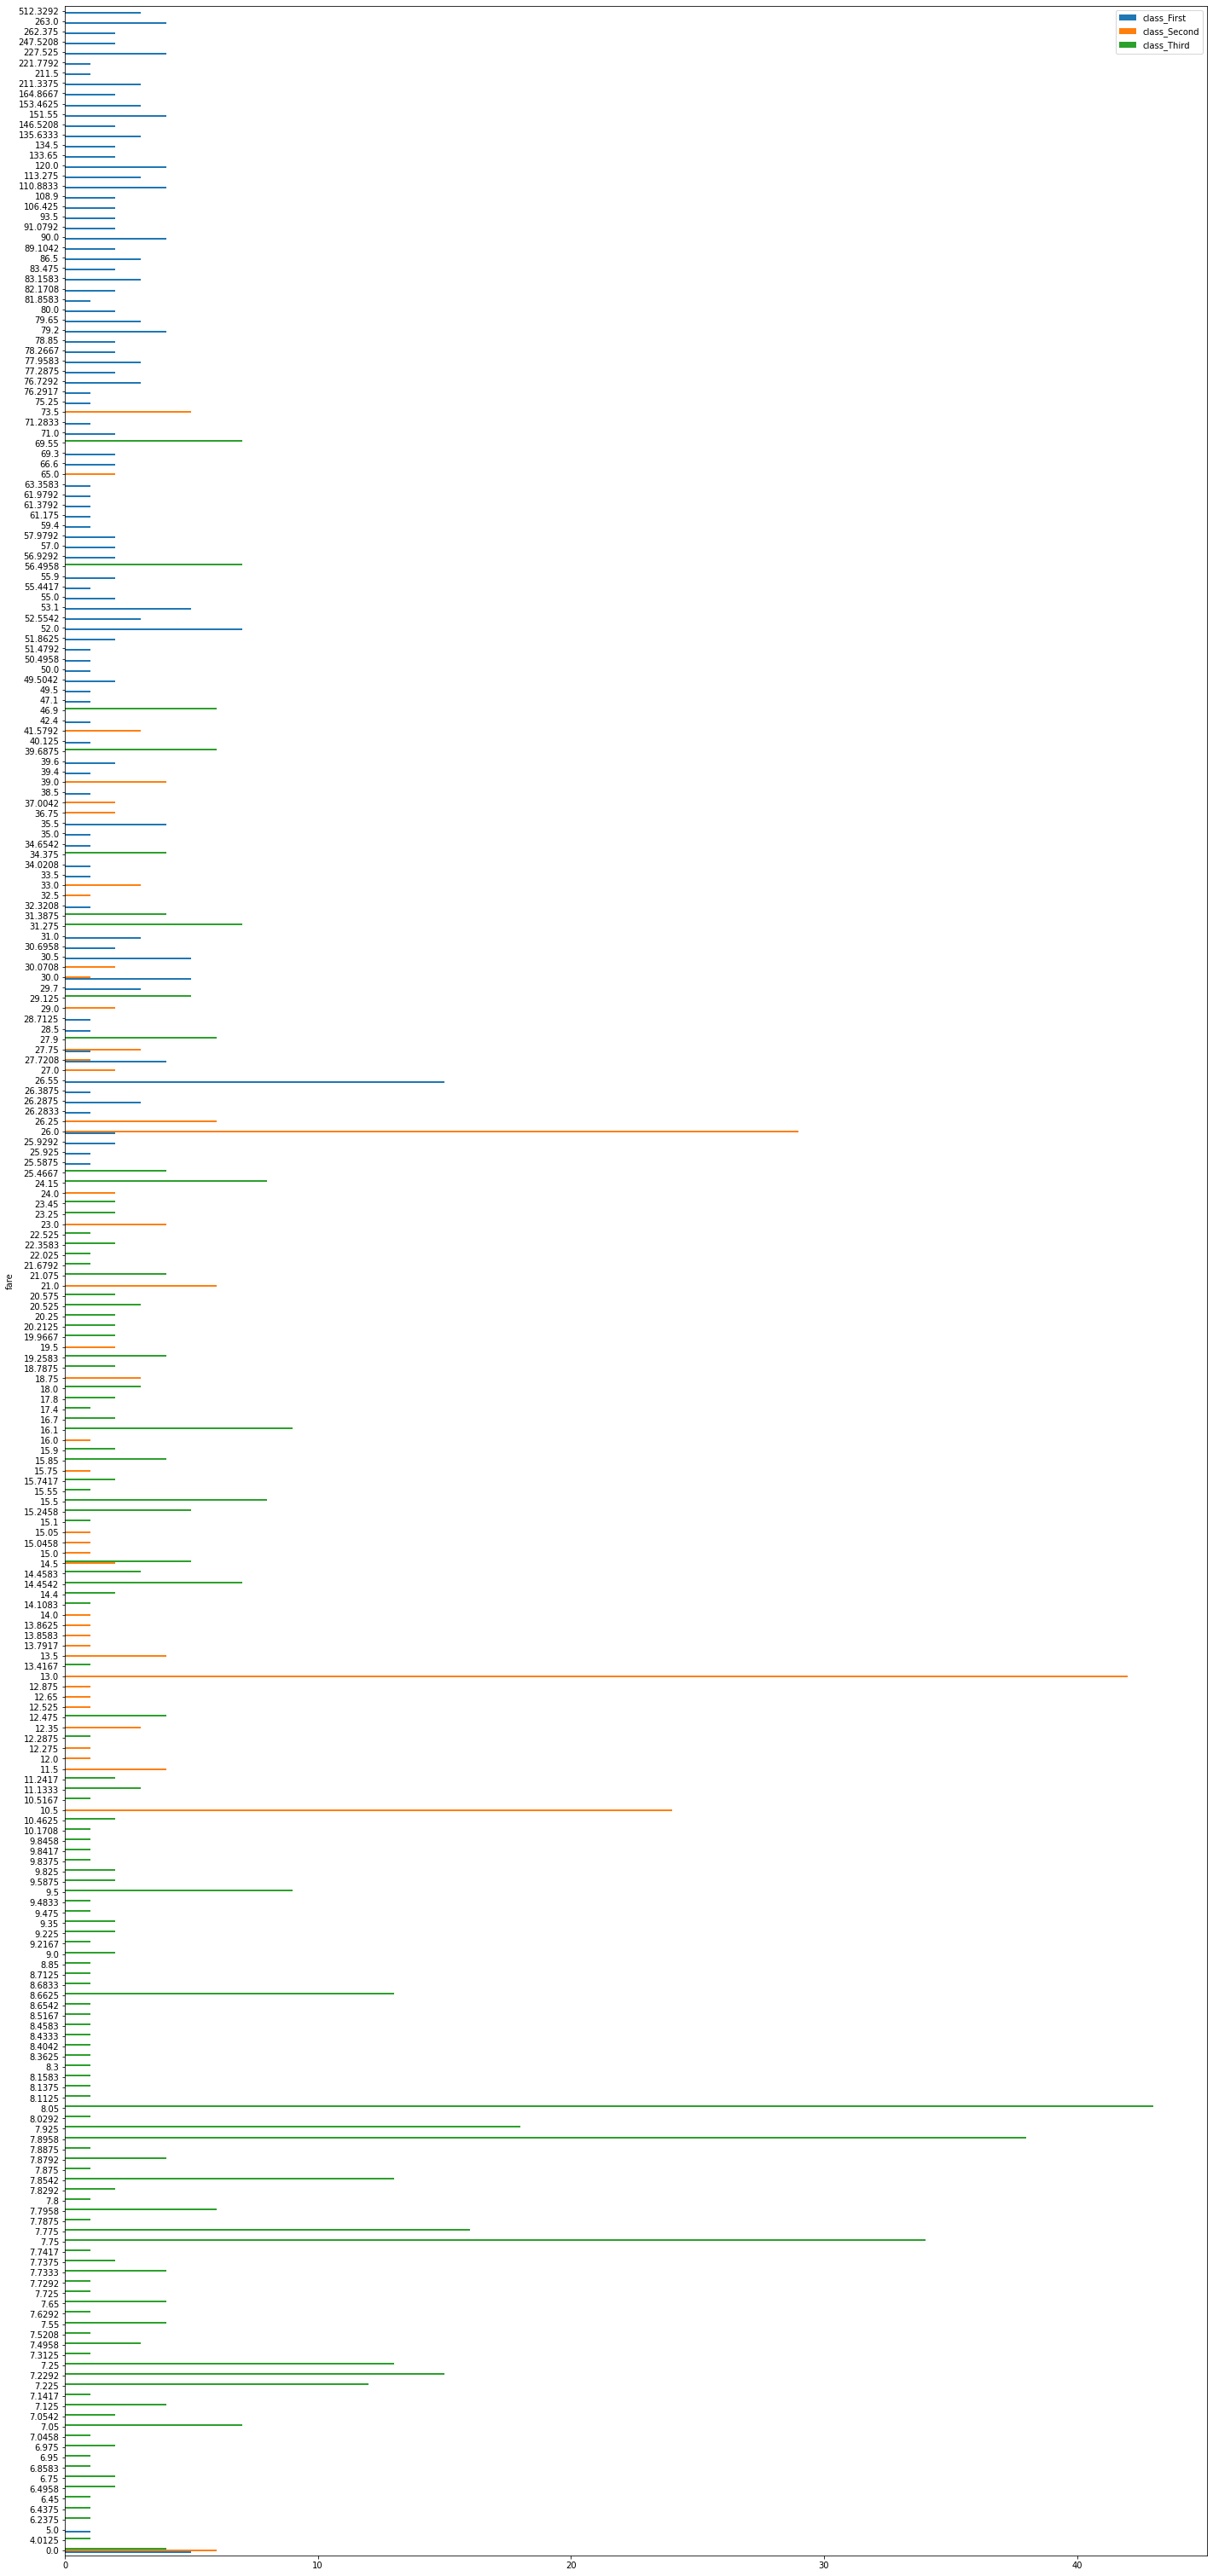

In [48]:
pd.get_dummies(titanic, columns=['class'])\
  .groupby(['fare']).sum()[['class_First','class_Second','class_Third']]\
  .plot.barh(figsize=(24,55));

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f997f4c9f10>],
      dtype=object)

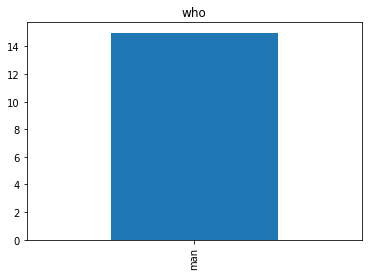

In [63]:
titanic['who'][titanic['fare']==0.0].value_counts().plot.bar(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9979469d50>],
      dtype=object)

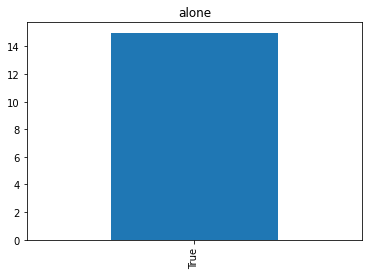

In [64]:
titanic['alone'][titanic['fare']==0.0].value_counts().plot.bar(subplots=True)

In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Questão 6

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset.

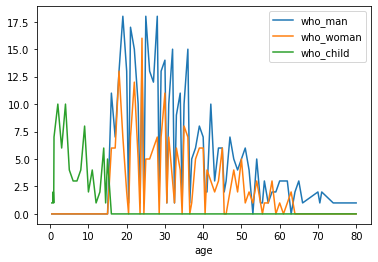

In [105]:
pd.get_dummies(titanic, columns=['who'])\
  .groupby(['age']).sum()[['who_man','who_woman','who_child']]\
  .dropna().plot.line();

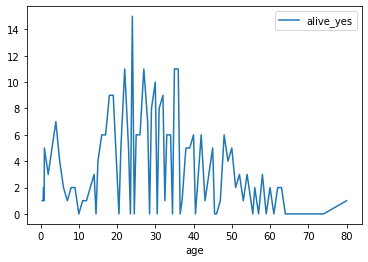

In [96]:
pd.get_dummies(titanic, columns=['alive'])\
  .groupby(['age']).sum()[['alive_yes']]\
  .dropna().plot.line();

#### Questão 7

Criar um gráfico com a biblioteca Pandas que mostre a distribuição de idades das pessoas no Titanic, coluna age no dataset separados por sexo em dois gráficos.

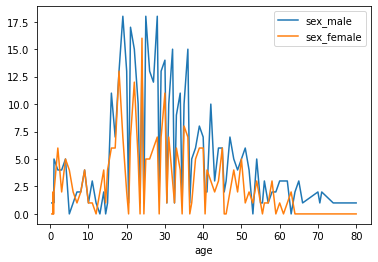

In [97]:
pd.get_dummies(titanic, columns=['sex'])\
  .groupby(['age']).sum()[['sex_male', 'sex_female']]\
  .dropna().plot.line();

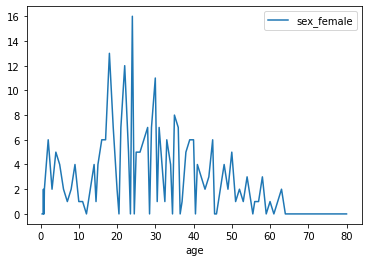

In [99]:
pd.get_dummies(titanic, columns=['sex'])\
  .groupby(['age']).sum()[['sex_female']]\
  .dropna().plot.line();

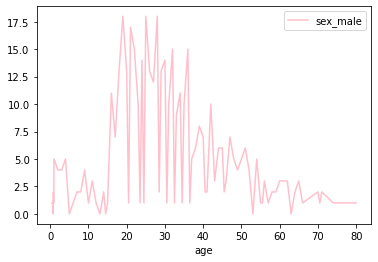

In [103]:
pd.get_dummies(titanic, columns=['sex'])\
  .groupby(['age']).sum()[['sex_male']]\
  .dropna().plot.line(color='pink');